### Get the data
### what is the target
### Take the target and observe downtrend or uptrend
### Create input(features) and ouputs(target)
### Train_test_split
### Reshape the inputs
### Create a Model
### Compile the model with the proper optimizer and loss
### Evaluate the model with test data



In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
!ls 'My Drive/SUMMER INTERNSHIP'

'10-7-2020 , 11-7-2020.ipynb'  'assignment37 (9-7-2020).ipynb'
 14-7-2020		       'assignment38(10-7-2020)'
 15-7-2020.ipynb	       'assignment39(11-7-2020)'
 20-06-2020.ipynb	        titanic.csv
 9-7-2020.ipynb		        Untitled0.ipynb
 all_stocks_5yr.csv


In [4]:
#all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/SUMMER INTERNSHIP/all_stocks_5yr.csv')
data.shape

(619040, 7)

In [5]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [7]:
data['Name'].value_counts()

NUE     1259
LRCX    1259
KEY     1259
BIIB    1259
SBUX    1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [8]:
### How many company's data we have here?
data.Name.nunique()

505

In [12]:
## Selecting the data 
df = data[data['Name']=='NUE']
df.shape

(1259, 7)

In [14]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [15]:
#select the columns data and close price
df = df[['date','close']]
df

,date,close
421374,2013-02-08,46.74
421375,2013-02-11,46.87
421376,2013-02-12,47.24
421377,2013-02-13,47.47
421378,2013-02-14,48.23
...,...,...
422628,2018-02-01,66.38
422629,2018-02-02,64.24
422630,2018-02-05,62.54
422631,2018-02-06,63.60


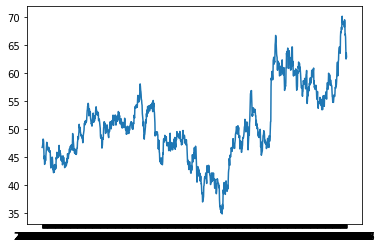

In [16]:
#line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [17]:
df.date[:10]

421374    2013-02-08
421375    2013-02-11
421376    2013-02-12
421377    2013-02-13
421378    2013-02-14
421379    2013-02-15
421380    2013-02-19
421381    2013-02-20
421382    2013-02-21
421383    2013-02-22
Name: date, dtype: object

In [18]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [19]:
df.shape

(1259, 2)

In [20]:
## Preparing the data
## Features and target
## Input and output
## last 7 days data as input
## X -- [[d1-d7],[d9,d15],[d17,23]....]
## y -- [d8,d16,d24,...]

## X = [[d1-d7],[d2-d8],]
## y = [d8,d9]

X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+421381])# 7,8,9
print(X[:2])

[421374    46.74
421375    46.87
421376    47.24
421377    47.47
421378    48.23
421379    48.12
421380    47.72
Name: close, dtype: float64, 421375    46.87
421376    47.24
421377    47.47
421378    48.23
421379    48.12
421380    47.72
421381    45.95
Name: close, dtype: float64]


In [21]:
import numpy as np
X = np.array(X)

In [22]:
df1 = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,46.74,46.87,47.24,47.47,48.23,48.12,47.72
1,46.87,47.24,47.47,48.23,48.12,47.72,45.95
2,47.24,47.47,48.23,48.12,47.72,45.95,44.70
3,47.47,48.23,48.12,47.72,45.95,44.70,45.18
4,48.23,48.12,47.72,45.95,44.70,45.18,43.71


In [23]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,46.74,46.87,47.24,47.47,48.23,48.12,47.72,45.95
1,46.87,47.24,47.47,48.23,48.12,47.72,45.95,44.70
2,47.24,47.47,48.23,48.12,47.72,45.95,44.70,45.18
3,47.47,48.23,48.12,47.72,45.95,44.70,45.18,43.71
4,48.23,48.12,47.72,45.95,44.70,45.18,43.71,43.85


In [24]:
df1.shape

(1251, 8)

In [25]:
1251 * 0.8

1000.8000000000001

In [26]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [27]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.448975e-16,-6.754597e-16,2.744471e-16,5.715428e-16,-1.696421e-16,-7.454037e-16,-2.275957e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.587984e+00,-2.584281e+00,-2.582192e+00,-2.580763e+00,-2.578937e+00,-2.577031e+00,-2.574843e+00
25%,-6.088357e-01,-6.099085e-01,-6.110436e-01,-6.121087e-01,-6.131235e-01,-6.139854e-01,-6.148641e-01
50%,9.764623e-04,3.348490e-04,1.025700e-04,1.109769e-03,2.998682e-03,3.160924e-03,2.262640e-03
75%,5.483294e-01,5.477940e-01,5.461928e-01,5.436635e-01,5.409808e-01,5.394398e-01,5.395925e-01
max,3.493927e+00,3.482955e+00,3.475136e+00,3.468901e+00,3.461997e+00,3.455397e+00,3.448162e+00


In [28]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss='mse')

In [30]:
X_test.shape

(251, 7)

In [31]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [32]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1960.8396 - val_loss: 1236.8901
Epoch 2/100
1000/1000 [==============================] - 1s 913us/step - loss: 331.2256 - val_loss: 537.2350
Epoch 3/100
1000/1000 [==============================] - 1s 899us/step - loss: 105.7254 - val_loss: 286.8419
Epoch 4/100
1000/1000 [==============================] - 1s 900us/step - loss: 42.6348 - val_loss: 186.3918
Epoch 5/100
1000/1000 [==============================] - 1s 921us/step - loss: 30.1364 - val_loss: 149.6397
Epoch 6/100
1000/1000 [==============================] - 1s 958us/step - loss: 28.3011 - val_loss: 138.7961
Epoch 7/100
1000/1000 [==============================] - 1s 927us/step - loss: 28.1327 - val_loss: 136.1855
Epoch 8/100
1000/1000 [==============================] - 1s 936us/step - loss: 28.1034 - val_loss: 136.7437
Epoch 9/100
1000/1000 [==============================] - 1s 915us/step - loss: 27.8383

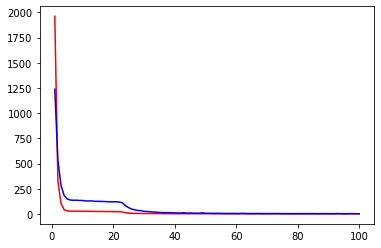

In [33]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [34]:
model.predict(X_test_sc)

array([[57.598724],
       [57.9582  ],
       [59.397804],
       [60.36724 ],
       [61.92431 ],
       [62.59911 ],
       [63.093773],
       [63.20266 ],
       [63.3044  ],
       [63.473682],
       [63.29924 ],
       [62.571342],
       [62.0401  ],
       [62.296837],
       [62.497658],
       [62.982254],
       [62.89691 ],
       [62.854767],
       [62.83512 ],
       [62.294296],
       [61.966545],
       [61.58351 ],
       [61.44995 ],
       [61.401314],
       [61.37844 ],
       [62.265995],
       [63.029552],
       [63.449707],
       [63.602524],
       [62.915817],
       [62.669014],
       [62.22863 ],
       [61.506638],
       [60.925903],
       [60.82284 ],
       [60.70765 ],
       [60.731323],
       [60.56987 ],
       [60.71863 ],
       [60.92729 ],
       [60.757214],
       [60.785645],
       [61.035522],
       [60.99543 ],
       [61.087418],
       [60.02916 ],
       [58.872147],
       [58.093773],
       [57.6623  ],
       [57.568626],


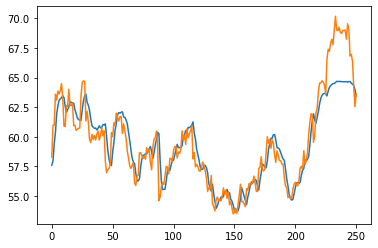

In [35]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

### Reshape the inputs

In [36]:
X_test_sc[0].reshape(1,7,1)

array([[[2.22567044],
        [1.83534558],
        [1.60988147],
        [1.71224079],
        [1.6813514 ],
        [1.77184082],
        [1.72946191]]])

In [ ]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[42.51565]], dtype=float32)

In [ ]:
y_test[1000]

41.01

### Create a Model

In [39]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


### Compile the model with the proper optimizer and loss

In [40]:
model2.compile(optimizer='adam',loss='mse')

In [42]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 983us/step - loss: 5.0437 - val_loss: 5.9720
Epoch 2/100
1000/1000 [==============================] - 1s 972us/step - loss: 5.6296 - val_loss: 4.2423
Epoch 3/100
1000/1000 [==============================] - 1s 941us/step - loss: 5.4859 - val_loss: 4.9491
Epoch 4/100
1000/1000 [==============================] - 1s 977us/step - loss: 5.1365 - val_loss: 4.5174
Epoch 5/100
1000/1000 [==============================] - 1s 948us/step - loss: 5.5779 - val_loss: 4.3081
Epoch 6/100
1000/1000 [==============================] - 1s 981us/step - loss: 5.8176 - val_loss: 4.5727
Epoch 7/100
1000/1000 [==============================] - 1s 957us/step - loss: 5.5295 - val_loss: 4.3845
Epoch 8/100
1000/1000 [==============================] - 1s 929us/step - loss: 6.5309 - val_loss: 3.7289
Epoch 9/100
1000/1000 [==============================] - 1s 934us/step - loss: 5.8018 - val_loss: 3.6202
Epoch 10

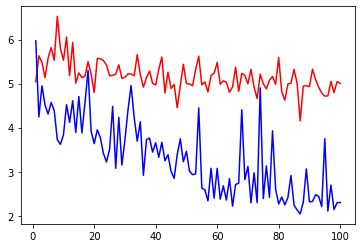

In [43]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [44]:
model2.predict(X_test_sc)

array([[57.348816],
       [57.788433],
       [59.522377],
       [60.063206],
       [61.60986 ],
       [61.93865 ],
       [62.450367],
       [62.56851 ],
       [62.77721 ],
       [63.052   ],
       [62.689934],
       [61.507626],
       [61.10665 ],
       [61.754314],
       [61.801273],
       [62.454243],
       [62.14232 ],
       [62.09835 ],
       [62.15974 ],
       [61.27032 ],
       [60.99011 ],
       [60.631958],
       [60.48284 ],
       [60.44752 ],
       [60.44424 ],
       [61.754955],
       [62.58077 ],
       [62.9477  ],
       [63.161366],
       [61.903828],
       [61.903614],
       [61.392002],
       [60.329422],
       [59.790836],
       [59.980892],
       [59.66452 ],
       [59.773167],
       [59.60578 ],
       [59.832325],
       [60.050022],
       [59.692326],
       [59.831936],
       [60.23026 ],
       [59.94692 ],
       [60.136036],
       [58.628464],
       [57.534008],
       [57.28273 ],
       [57.12967 ],
       [57.19249 ],


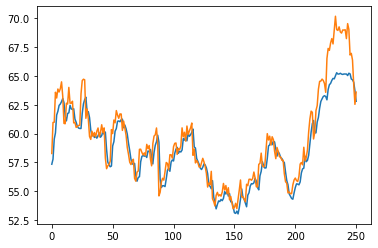

In [45]:
plt.plot(range(len(X_test_sc)),model2.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)